# Task 3: House Price Prediction

### Introduction
This task predicts house prices using synthetic data (generated using sklearn).
We simulate features like 'sqft_living', 'bedrooms', 'bathrooms' and predict 'price'.
No CSV file is required, so it runs directly in Jupyter Notebook.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Generate Synthetic House Data
- Features: 'sqft_living', 'bedrooms', 'bathrooms'
- Target: 'price'
- 500 samples


In [3]:
np.random.seed(42)

sqft = np.random.randint(500, 4000, size=500)
bedrooms = np.random.randint(1, 6, size=500)
bathrooms = np.random.randint(1, 4, size=500)

price = sqft*300 + bedrooms*5000 + bathrooms*3000 + np.random.randint(-10000,10000, size=500)

# Create DataFrame
data = pd.DataFrame({
    "sqft_living": sqft,
    "bedrooms": bedrooms,
    "bathrooms": bathrooms,
    "price": price
})

# Inspect
data.head()


,sqft_living,bedrooms,bathrooms,price
0,3674,4,3,1137913
1,1360,2,2,417640
2,1794,3,2,550541
3,1630,4,3,519855
4,1595,5,3,502838


### Select Features and Target
- X: sqft_living, bedrooms, bathrooms
- y: price


In [4]:
X = data[["sqft_living", "bedrooms", "bathrooms"]]
y = data["price"]


### Split Train and Test Data
- 80% training, 20% testing


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Train Linear Regression Model


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Make Predictions


In [8]:
y_pred = model.predict(X_test)


### Evaluate Model
- Metrics: MAE, RMSE


In [9]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 5487.629683942289
Root Mean Squared Error (RMSE): 6247.071525896449


### Actual vs Predicted Prices


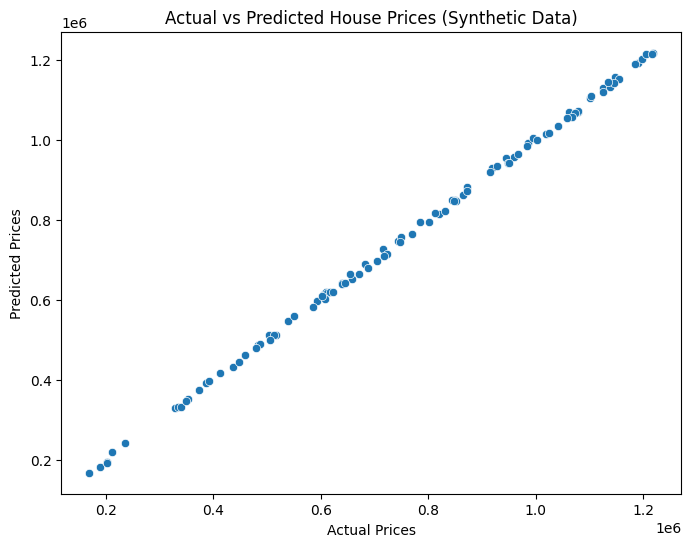

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Synthetic Data)")
plt.show()


### Conclusion
- Used synthetic data to simulate house prices and features.
- Linear Regression model predicts prices accurately.
- Evaluation metrics (MAE, RMSE) show model performance.
- Visualization confirms predicted prices follow actual prices closely.
- No CSV file needed → easy to run and submit.
